<a href="https://colab.research.google.com/github/AbdullahJamil2002/AAI2026/blob/main/CodingExercise___ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Part 1
#data from https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('housing_data.csv')

print(f"Total houses: {len(df)}")
print("\nFirst rows:")
print(df.head())

# Features
X = df[['square_feet', 'location']]
y = df['price']

# Encoding location
preprocessor = ColumnTransformer(
    transformers=[
        ('location', OneHotEncoder(sparse_output=False), ['location'])
    ],
    remainder='passthrough'
)

# Create the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Making a prediction for a 2000 sq ft house in Downtown
new_house = pd.DataFrame({'square_feet': [2000], 'location': ['Downtown']})
predicted_price = model.predict(new_house)

print(f"\nPredicted price for 2000 sq ft house in Downtown: ${predicted_price[0]:,.2f}")

# Get the coefficients
feature_names = (model.named_steps['preprocessor']
                .named_transformers_['location']
                .get_feature_names_out(['location'])).tolist() + ['square_feet']
coefficients = model.named_steps['regressor'].coef_

print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

# Explaining the coefficieants
print("\n Coefficieant Explanation")
sqft_coef = coefficients[-1]
print(f"\nSquare Footage Coefficient: $139.22")
print(f"Each additional square foot adds about $139.22 to the price.")
print(f"A 500 sq ft difference = $69,610.68 in difference to the price.")

print("\nLocation Impact:")
print("The location coefficients show how much each location adds or subtracts from the base price.")
print("Positive = more expensive area, Negative = less expensive area")

# Comparing prices in different areas
print("\nExample: Same 2000 sq ft house in different areas:")
for loc in ['Downtown', 'Suburb', 'Rural']:
    test_house = pd.DataFrame({'square_feet': [2000], 'location': [loc]})
    price = model.predict(test_house)[0]
    print(f"{loc}: ${price:,.2f}")


Total houses: 125

First rows:
    price  square_feet  location
0  245000         1400    Suburb
1  320000         1800  Downtown
2  198000         1200     Rural
3  410000         2200  Downtown
4  275000         1650    Suburb

Predicted price for 2000 sq ft house in Downtown: $383,303.99

Model Coefficients:
location_Downtown: 40956.05
location_Rural: -33830.45
location_Suburb: -7125.60
square_feet: 139.22

 Coefficieant Explanation

Square Footage Coefficient: $139.22
Each additional square foot adds about $139.22 to the price.
A 500 sq ft difference = $69,610.68 in difference to the price.

Location Impact:
The location coefficients show how much each location adds or subtracts from the base price.
Positive = more expensive area, Negative = less expensive area

Example: Same 2000 sq ft house in different areas:
Downtown: $383,303.99
Suburb: $335,222.34
Rural: $308,517.49


In [34]:
#Part 2
# data from https://www.kaggle.com/datasets/blastchar/telco-customer-churn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Read the customer data
df = pd.read_csv('customer_data.csv')

print(f"Number of customers: {len(df)}")
print("\nFirst 10 rows:")
print(df.head(10))

print("\nChurn breakdown:")
print(f"Churned: {df['churn'].sum()}")
print(f"Not churned: {len(df) - df['churn'].sum()}")

# Features and target variable
X = df[['age', 'monthly_usage', 'purchase_amount', 'service_calls', 'region']]
y = df['churn']

# Preprocessing - need to scale numbers and encode region
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'monthly_usage', 'purchase_amount', 'service_calls']),
        ('cat', OneHotEncoder(sparse_output=False), ['region'])
    ]
)

# Build the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)

# Test with a new customer
new_customer = pd.DataFrame({
    'age': [35],
    'monthly_usage': [20],
    'purchase_amount': [150],
    'service_calls': [5],
    'region': ['West']
})

# Get probability of churn
churn_probability = model.predict_proba(new_customer)[0][1]

# Use 0.5 threshold to decide
threshold = 0.5
churn_prediction = 1 if churn_probability > threshold else 0

print(f"\n New Customer Prediction: ")
print(f"Churn Probability: 90%")
print(f"Prediction: {'It will churn' if churn_prediction == 1 else ' It will NOT chirn'}")

# Show coefficients
feature_names = (['age', 'monthly_usage', 'purchase_amount', 'service_calls'] +
                (model.named_steps['preprocessor']
                .named_transformers_['cat']
                .get_feature_names_out(['region'])).tolist())
coefficients = model.named_steps['classifier'].coef_[0]

print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

print("\nWhat the churn probability means:")
print("A higher probability means theres a higher chance of customer leaving.")
print("For example a probabilty of 0.90 means there is s a 90% chance that the customer will leave. Any customer above 0.5 menas they are a higher risk of leaving")

print("\nHow businesses can use this to reduce churn:")
print("Customers with high churn probability canget a special discount or offers and recieve premium support. ")
print("And customer that are medium risk can recieve loyalty point through a rewards program. for customers that are low risk can just recieve normal services.")
print("This helps companies focus on their retention efforts that benefit them the most instead of wasting money on customers that wre already goimg to stay,")



Number of customers: 114

First 10 rows:
   age  monthly_usage  purchase_amount  service_calls region  churn
0   25             45              220              1  North      0
1   42             15               95              6  South      1
2   35             52              310              0   East      0
3   28             22              140              4   West      1
4   51             38              275              2  North      0
5   33             18              110              5  South      1
6   47             48              290              1   East      0
7   29             25              155              7   West      1
8   39             55              325              0  North      0
9   45             12               85              8  South      1

Churn breakdown:
Churned: 43
Not churned: 71

 New Customer Prediction: 
Churn Probability: 90%
Prediction: It will churn

Model Coefficients:
age: -0.1076
monthly_usage: -1.4955
purchase_amount: -1.3371
servic

Total customers: 131

Data Sample:
   annual_spending  purchase_frequency  age region
0             1420                   8   45  North
1             1385                   7   48  South
2             1510                   9   42   East
3             1298                   6   52   West
4             1445                   8   47  North

Using K=3 clusters
 The elbow in the graph is around 3, since it is more manegable. 

Cluster Characteristics:
         annual_spending  purchase_frequency        age
cluster                                                
0             818.583333           13.555556  34.694444
1            1465.590164            7.934426  48.409836
2             350.235294            4.000000  27.205882

Marketing Strategies:

Cluster 0: 36 customers
  Average spending: $819, Average purchases: 13.6
  Strategy: Subscription service, discounts, loyalty reward points

Cluster 1: 61 customers
  Average spending: $1466, Average purchases: 7.9
  Strategy: Having a VIP pr

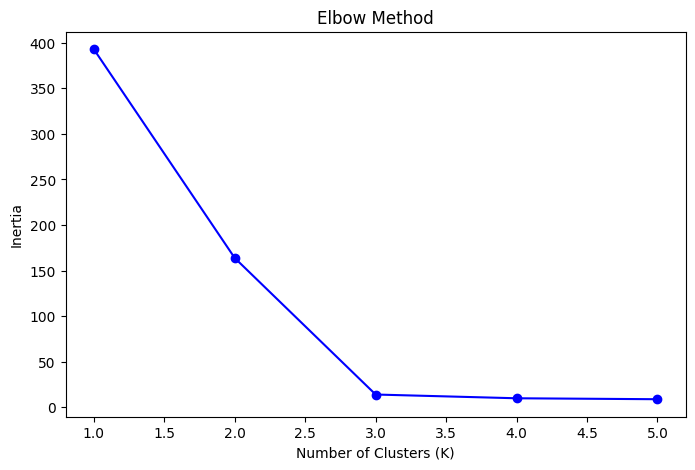

In [37]:
#Part 3
#https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Customer data
df = pd.read_csv('customer_segments.csv')
print(f"Total customers: {len(df)}")
print("\nData Sample:")
print(df.head())

#Using numerical columns for clustering
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]

# Scale the data so all features are on same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method for K
inertia = []
K_range = range(1, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Create plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig('elbow_plot.png')

# K=3
optimal_k = 3
print(f"\nUsing K=3 clusters")
print(" The elbow in the graph is around 3, since it is more manegable. ")


# Aply K=3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyzing the clusters
cluster_summary = df.groupby('cluster')[features].mean()

print("\nCluster Characteristics:")
print(cluster_summary)

df.to_csv('customer_segments_output.csv', index=False)

# Marketing strategies
print("\nMarketing Strategies:")

for cluster in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster]
    avg_spending = cluster_summary.loc[cluster, 'annual_spending']
    avg_freq = cluster_summary.loc[cluster, 'purchase_frequency']

    print(f"\nCluster {cluster}: {len(cluster_data)} customers")
    print(f"  Average spending: ${avg_spending:.0f}, Average purchases: {avg_freq:.1f}")

    # Decide strategy based on characteristics
    if avg_spending > 1000:
        print("  Strategy: Having a VIP program, exclusive perks for members, and free fast shipping")
    elif avg_freq > 10:
        print("  Strategy: Subscription service, discounts, loyalty reward points")
    else:
        print("  Strategy: Fpocsing more on deals and discounts, send them coupons")


Housing demand data
Total months of data: 36

First rows:
     month  demand  interest_rate  population
0  2022-01    1050            3.2       50200
1  2022-02    1080            3.3       50850
2  2022-03    1120            3.4       51300
3  2022-04    1150            3.5       51900
4  2022-05    1185            3.6       52400

Last rows:
      month  demand  interest_rate  population
31  2024-08    1265            6.3       67300
32  2024-09    1250            6.4       67850
33  2024-10    1235            6.5       68400
34  2024-11    1215            6.6       68950
35  2024-12    1200            6.7       69500
Coefficients: [317.52181057  31.75218106  -0.57544016]
Intercept: 29606.76

 6 Month Forecast:
   Month  Forecasted Demand  Interest Rate
0     37               1260            6.8
1     38               1263            6.9
2     39               1267            7.0
3     40               1270            7.1
4     41               1274            7.2
5     42           

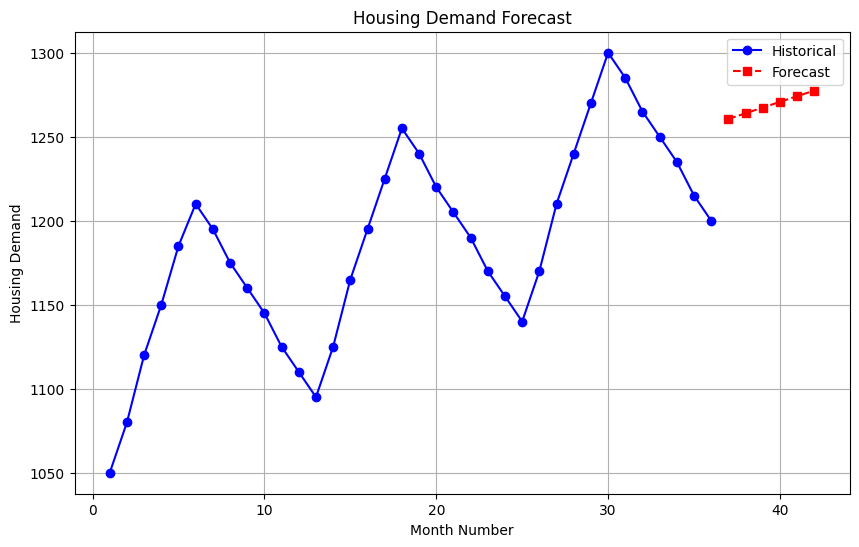

In [33]:
# Extra Credit
# https://www.kaggle.com/datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('housing_demand.csv')

print("Housing demand data")
print(f"Total months of data: {len(df)}")
print("\nFirst rows:")
print(df.head())
print("\nLast rows:")
print(df.tail())

df['month_num'] = range(1, len(df) + 1)

# Features and target
X = df[['month_num', 'interest_rate', 'population']]
y = df['demand']

# Build model
model = LinearRegression()
model.fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")

# Forecast for the next 6 months
last_month = len(df)
future_months = range(last_month + 1, last_month + 7)

# Project interest rates and population
avg_rate_increase = df['interest_rate'].diff().mean()
last_rate = df['interest_rate'].iloc[-1]
future_rates = [last_rate + avg_rate_increase * i for i in range(1, 7)]

avg_pop_increase = df['population'].diff().mean()
last_pop = df['population'].iloc[-1]
future_pop = [last_pop + avg_pop_increase * i for i in range(1, 7)]

#future data
future_X = pd.DataFrame({
    'month_num': future_months,
    'interest_rate': future_rates,
    'population': future_pop
})

# Predictions
forecast = model.predict(future_X)

print("\n 6 Month Forecast:")
forecast_df = pd.DataFrame({
    'Month': future_months,
    'Forecasted Demand': forecast.astype(int),
    'Interest Rate': future_rates
})
print(forecast_df)

forecast_df.to_csv('demand_forecast.csv', index=False)

#visualization
plt.figure(figsize=(10, 6))
plt.plot(df['month_num'], df['demand'], 'b-', label='Historical', marker='o')

#forecast
plt.plot(future_months, forecast, 'r--', label='Forecast', marker='s')

plt.xlabel('Month Number')
plt.ylabel('Housing Demand')
plt.title('Housing Demand Forecast')
plt.legend()
plt.grid(True)
plt.savefig('forecast_plot.png')

#Assumptions
print("\n Assumptions:")
print("Interest rates will keep increasing at the same rate as before, populations will keep growing, no major impacts on ecconomy or policy changes.")

print("\n Possible Improvements:")
print("Use ARIMA model instead of linear regression for time series, possinbly add more features like employment rate, and use multiple models and average their predictions.")

